<a href="https://colab.research.google.com/github/PriyankaSuruguri/Credit_Card_Fraud_Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.layers import Input, Dense
from keras import Model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import io
from google.colab import files
import seaborn as sn
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:

df.shape

(284807, 31)

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

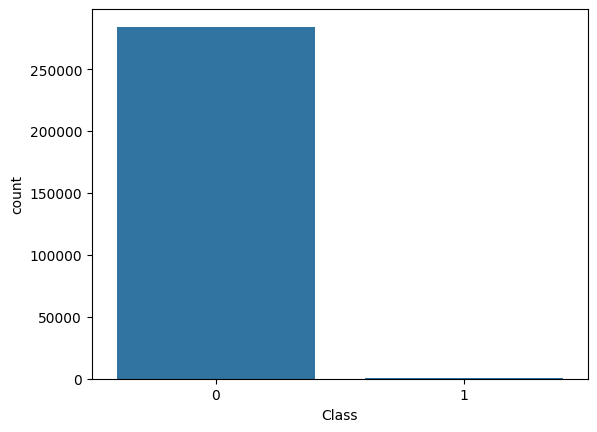

In [ ]:
sn.countplot(data=df, x='Class')

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Discard columns 'Time', 'Amount'
df = df.drop(['Time', 'Amount'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
237539,-0.675438,0.937232,1.672312,-0.303486,0.134264,-0.157333,0.348883,0.194426,-0.130575,-1.328372,...,0.014918,0.274853,0.919769,-0.583477,-0.042940,0.640426,0.047579,0.093781,0.083240,0
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1
228695,1.512643,-2.435650,-0.340855,-0.568008,-1.580269,1.125837,-1.474137,0.397041,0.970963,0.514056,...,0.572799,0.305483,0.430191,-0.086973,0.124520,-0.389681,-0.222619,-0.006526,0.005240,0
243547,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,-1.482121,-4.868747,...,-0.953827,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,1
106679,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,-1.801937,-4.711769,...,0.895841,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,1


In [ ]:
new_df.shape

(984, 29)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 237539 to 15566
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      984 non-null    float64
 1   V2      984 non-null    float64
 2   V3      984 non-null    float64
 3   V4      984 non-null    float64
 4   V5      984 non-null    float64
 5   V6      984 non-null    float64
 6   V7      984 non-null    float64
 7   V8      984 non-null    float64
 8   V9      984 non-null    float64
 9   V10     984 non-null    float64
 10  V11     984 non-null    float64
 11  V12     984 non-null    float64
 12  V13     984 non-null    float64
 13  V14     984 non-null    float64
 14  V15     984 non-null    float64
 15  V16     984 non-null    float64
 16  V17     984 non-null    float64
 17  V18     984 non-null    float64
 18  V19     984 non-null    float64
 19  V20     984 non-null    float64
 20  V21     984 non-null    float64
 21  V22     984 non-null    float64
 22  

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


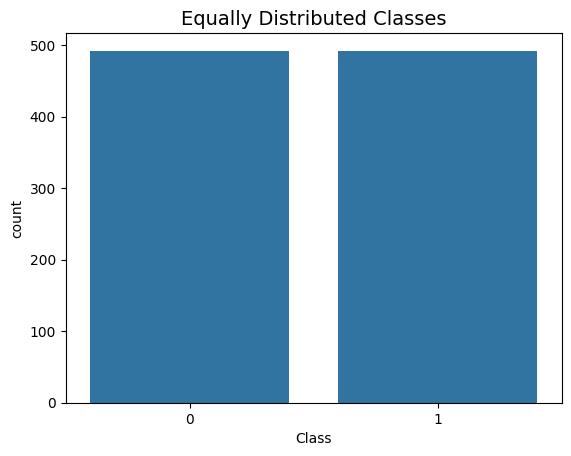

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sn.countplot(data=new_df, x='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

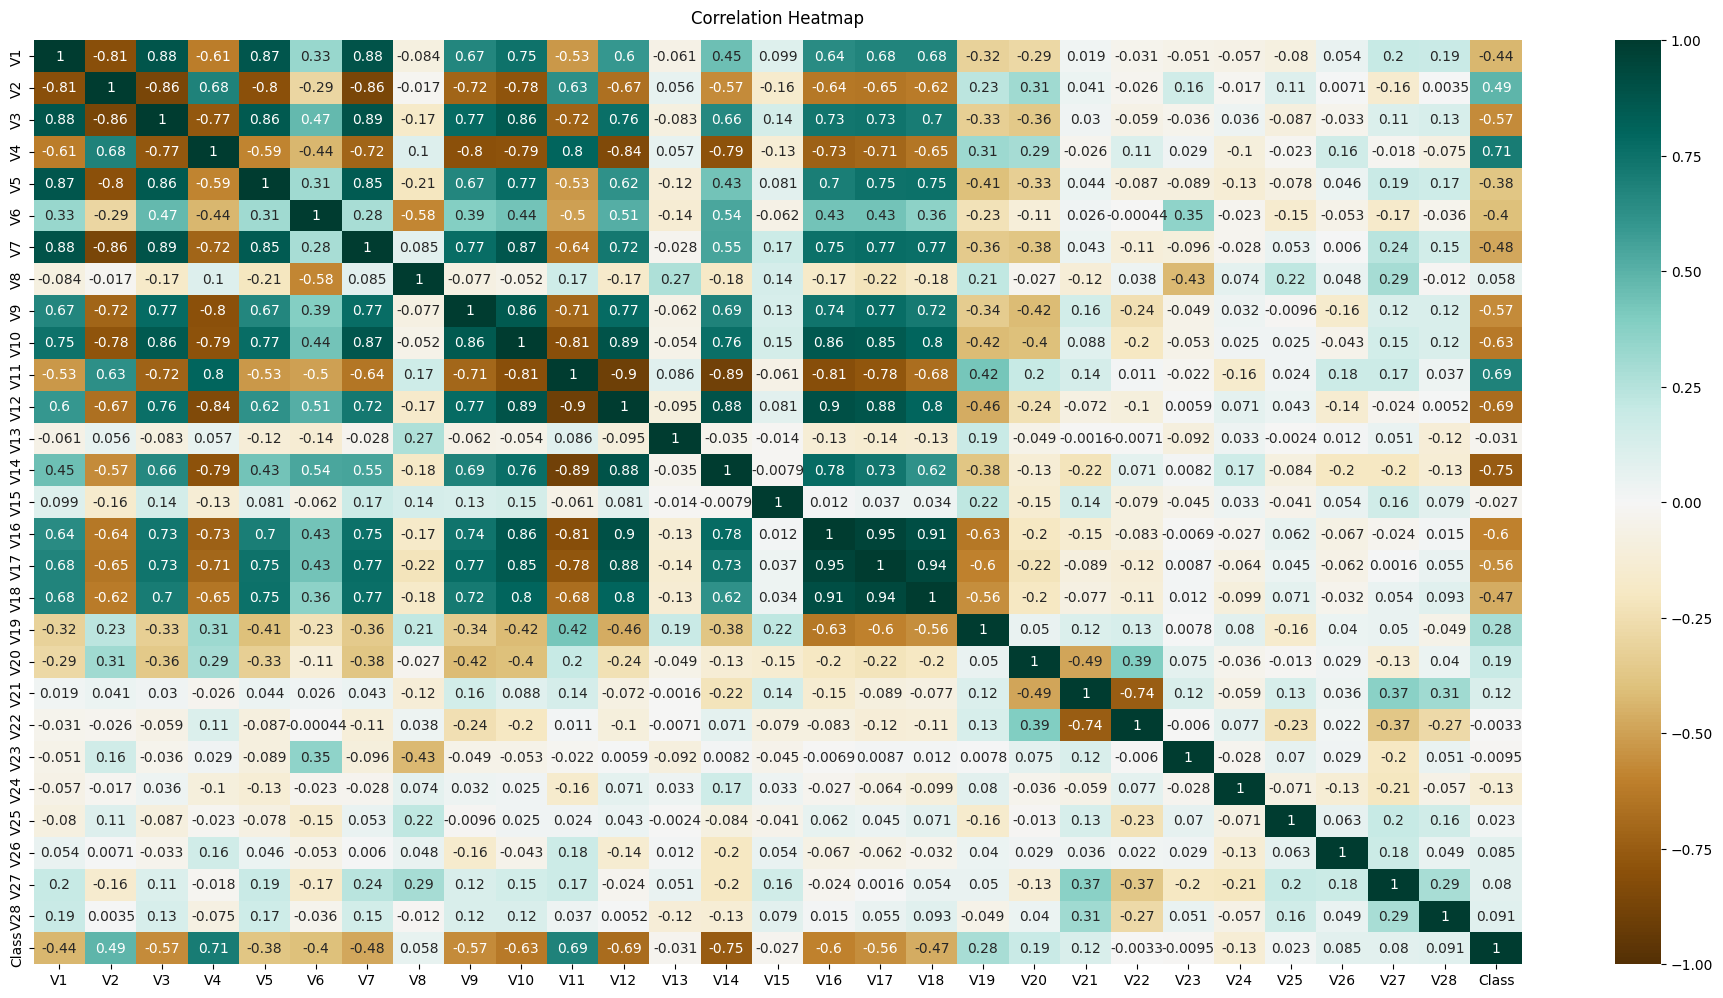

In [ ]:
plt.figure(figsize=(24, 12))
heatmap = sn.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
target_variable = 'Class'
correlation_matrix = new_df.corr()
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)
print("Correlation of {} with other features:".format(target_variable))
print(correlation_with_target)

Correlation of Class with other features:
V1    -0.437300
V2     0.489350
V3    -0.567866
V4     0.705361
V5    -0.376416
V6    -0.400227
V7    -0.480063
V8     0.057567
V9    -0.566687
V10   -0.625344
V11    0.685464
V12   -0.686339
V13   -0.031172
V14   -0.750063
V15   -0.026714
V16   -0.597546
V17   -0.559255
V18   -0.465483
V19    0.282354
V20    0.193447
V21    0.121531
V22   -0.003271
V23   -0.009533
V24   -0.129062
V25    0.022948
V26    0.085327
V27    0.080124
V28    0.090593
Name: Class, dtype: float64


Text(0.5, 1.0, "'V17 vs Class (Negative Correlation)'")

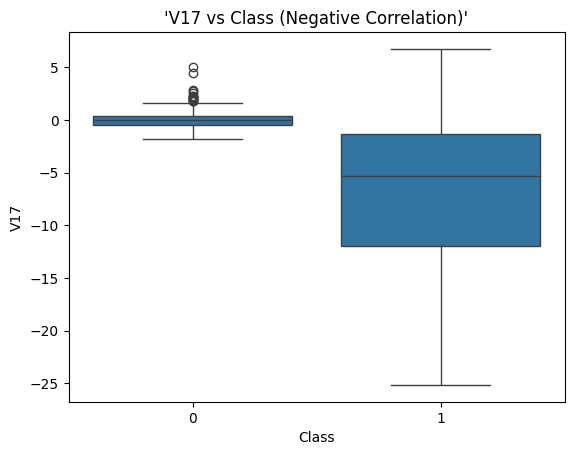

In [ ]:
sn.boxplot(x="Class", y="V17", data=new_df)
plt.title("'V17 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V14 vs Class (Negative Correlation)'")

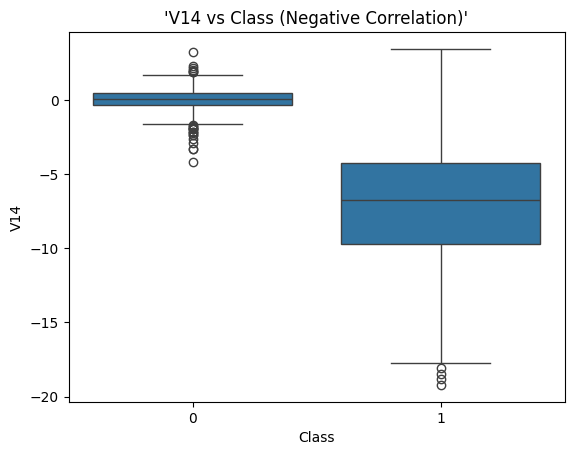

In [ ]:
sn.boxplot(x="Class", y="V14", data=new_df)
plt.title("'V14 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V12 vs Class (Negative Correlation)'")

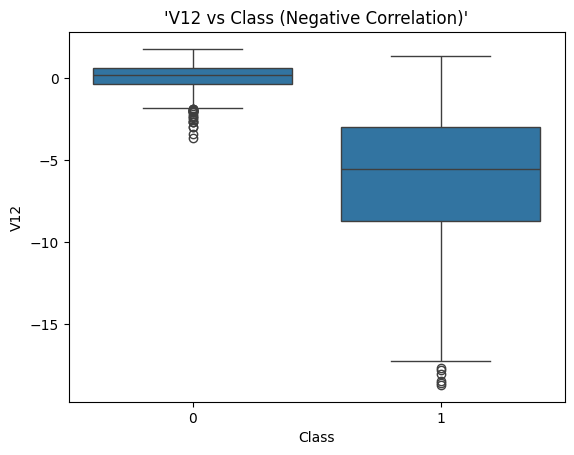

In [ ]:
sn.boxplot(x="Class", y="V12", data=new_df)
plt.title("'V12 vs Class (Negative Correlation)'")


Text(0.5, 1.0, "'V10 vs Class (Negative Correlation)'")

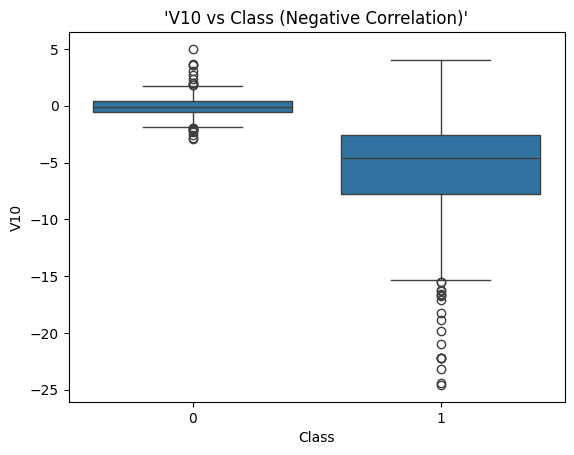

In [ ]:
sn.boxplot(x="Class", y="V10", data=new_df)
plt.title("'V10 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V11 vs Class (Positive Correlation)'")

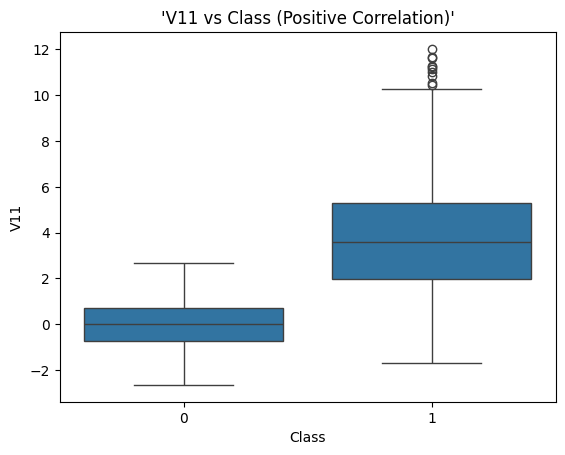

In [ ]:
sn.boxplot(x="Class", y="V11", data=new_df)
plt.title("'V11 vs Class (Positive Correlation)'")


Text(0.5, 1.0, "'V4 vs Class (Positive Correlation)'")

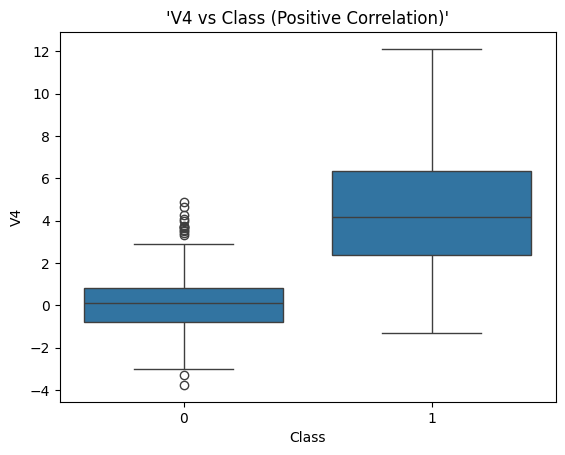

In [ ]:
sn.boxplot(x="Class", y="V4", data=new_df)
plt.title("'V4 vs Class (Positive Correlation)'")

Text(0.5, 1.0, "'V2 vs Class (Positive Correlation)'")

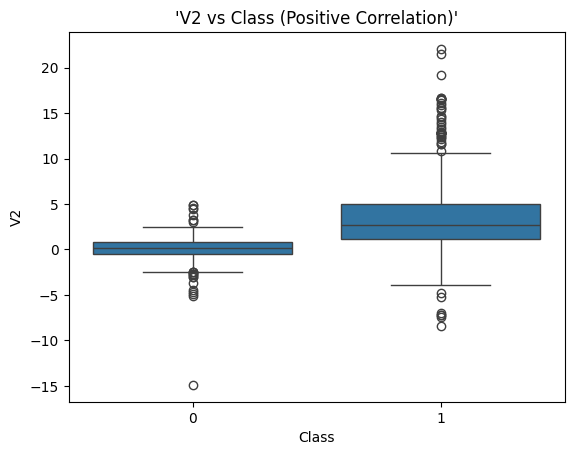

In [ ]:
sn.boxplot(x="Class", y="V2", data=new_df)
plt.title("'V2 vs Class (Positive Correlation)'")

Text(0.5, 1.0, "'V19 vs Class (Positive Correlation)'")

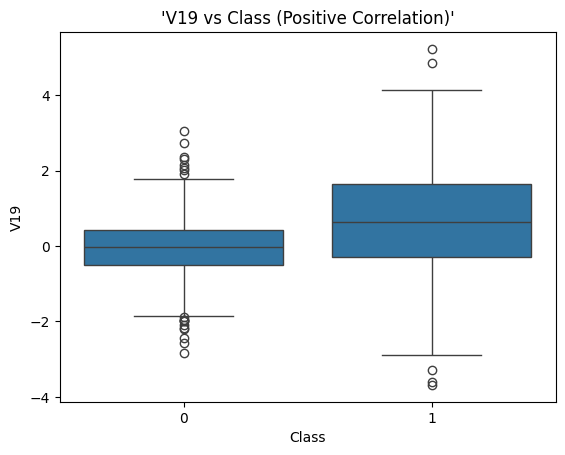

In [ ]:
sn.boxplot(x="Class", y="V19", data=new_df)
plt.title("'V19 vs Class (Positive Correlation)'")

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
X.shape

(984, 28)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(787, 28)

In [ ]:
X_test.shape

(197, 28)

In [ ]:
# Build AutoEncoder model
input_layer = Input(shape=(28,))
encoded = Dense(24, activation='relu')(input_layer)
encoded = Dense(20, activation='relu')(encoded)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(24, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

encoded_input = Input(shape=(10,))
decoder_layer = decoded
autoencoder = Model(input_layer, decoder_layer)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │             696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 28)                  │             700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,360 (13.12 KB)

 Trainable params: 3,360 (13.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 15.0879 - val_loss: 18.3341
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.9515 - val_loss: 17.9274
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3805 - val_loss: 17.3024
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3585 - val_loss: 17.1330
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.7160 - val_loss: 17.0981
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.4554 - val_loss: 17.0890
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1816 - val_loss: 17.0831
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4487 - val_loss: 17.0747
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4667 - val_loss: 17.0660
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1454 - val_loss: 17.0621


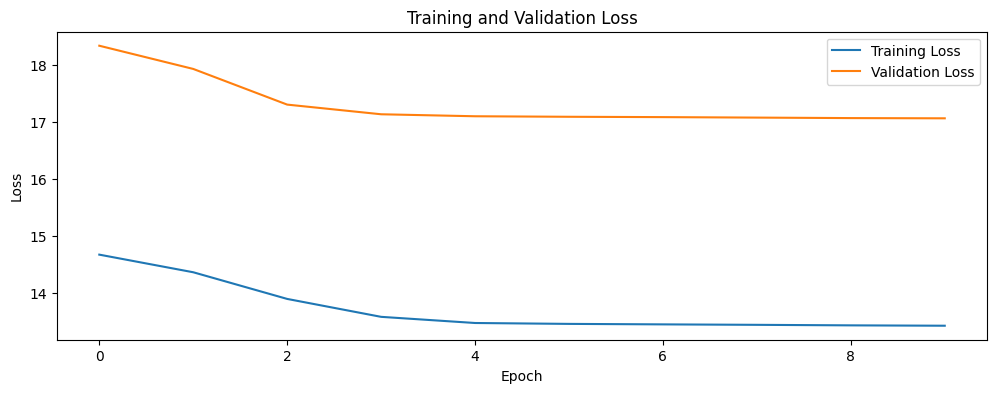

In [ ]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Extract features from the bottleneck layer
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
X_encoded.shape


(197, 10)

In [ ]:
# Apply K-means clustering and generate reference labels
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_encoded)

In [ ]:
# Apply t-SNE on the 10-dimensional feature embedding
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_encoded)

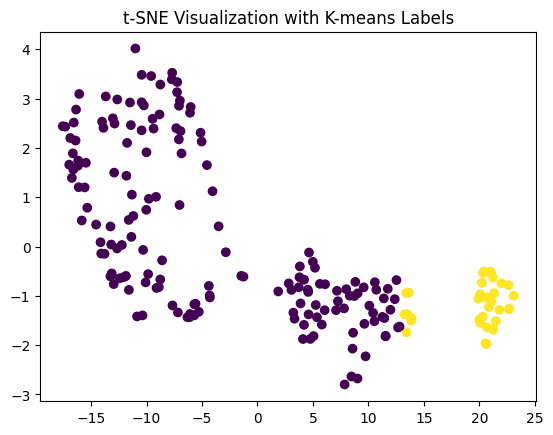

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('t-SNE Visualization with K-means Labels')
plt.show()


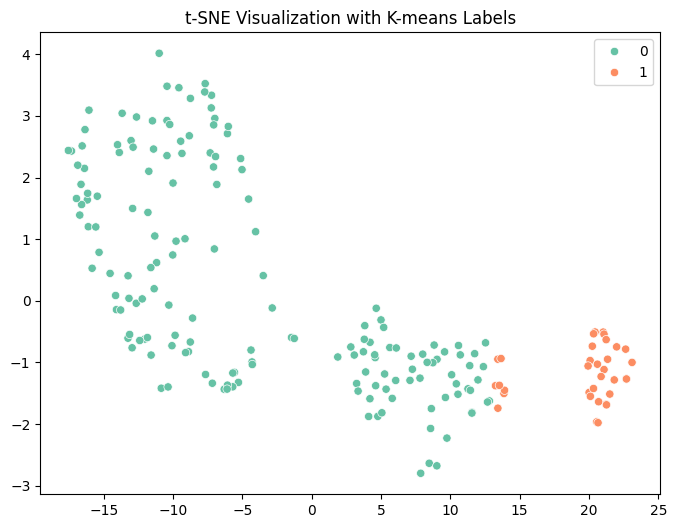

In [ ]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='Set2', legend='full')
plt.title('t-SNE Visualization with K-means Labels')
plt.show()

In [ ]:
true_labels = y_test


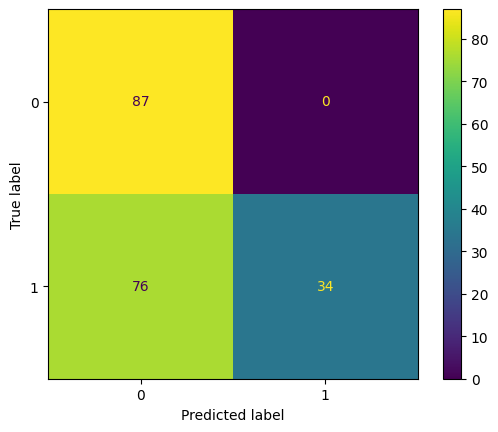

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, kmeans_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, silhouette_score, precision_score, recall_score

# Evaluate K-means clustering
accuracy = accuracy_score(true_labels, kmeans_labels)
f1 = f1_score(true_labels, kmeans_labels)
roc_auc = roc_auc_score(true_labels, kmeans_labels)
precision, recall, _ = precision_recall_curve(true_labels, kmeans_labels)
silhouette = silhouette_score(X_encoded, kmeans_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'Silhouette Score: {silhouette:.4f}')

Accuracy: 0.6142
F1 Score: 0.4722
ROC AUC Score: 0.6545
Silhouette Score: 0.7489


In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(true_labels, kmeans_labels))



Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70        87
           1       1.00      0.31      0.47       110

    accuracy                           0.61       197
   macro avg       0.77      0.65      0.58       197
weighted avg       0.79      0.61      0.57       197



In [ ]:
from sklearn.metrics import roc_curve, auc


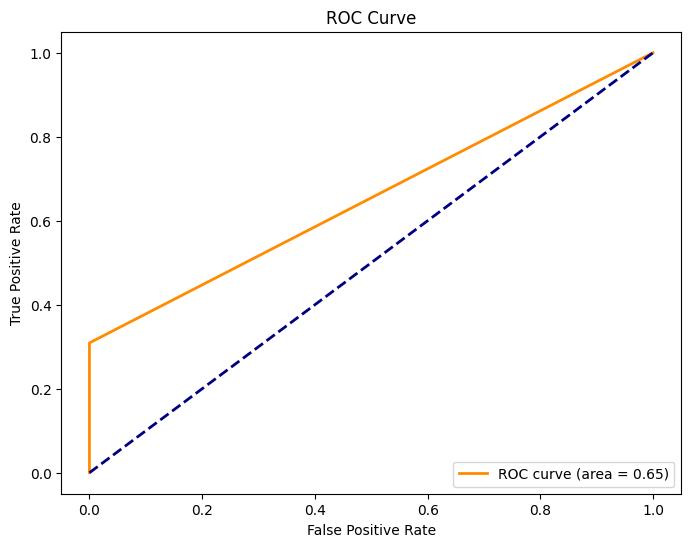

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, kmeans_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

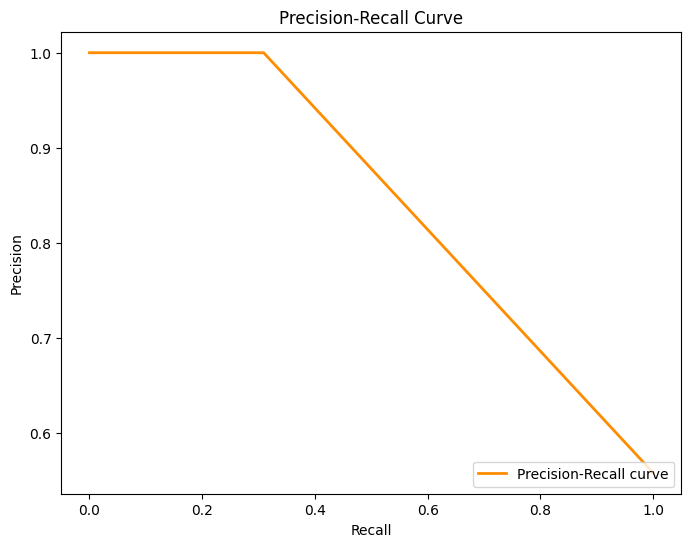

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(true_labels, kmeans_labels)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()